In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm, trange

sns.set()

In [2]:
data = np.load("big_embeds.npy")
with open("top_endecoder.pkl", "rb") as f:
    encoder, decoder = pickle.load(f)

labels = np.load("top_labels.npy")

print(f"Loaded {data.shape[0]} datapoints, each with {data.shape[1]} dimensions")

Loaded 2246567 datapoints, each with 512 dimensions


In [3]:
X = data
Y = labels

X_train, X_valtest, Y_train, Y_valtest = train_test_split(X, Y, test_size=0.2, random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_valtest, Y_valtest, test_size=0.5, random_state=43)

In [4]:
# Train models between 2 and 40 clusters
cluster_counts = [*range(2, 40)]

losses = []
models = []
for n in tqdm(cluster_counts):
    model = MiniBatchKMeans(n_clusters=n, verbose=0, n_init='auto')
    model.fit(X_train)
    models.append(model)
    Y_pred = model.predict(X_val)
    score = adjusted_rand_score(Y_val, Y_pred)
    losses.append(score)

cluster_counts = np.array(cluster_counts)
losses = np.array(losses)

100%|██████████| 38/38 [02:41<00:00,  4.26s/it]


Best number of clusters to match the original categories: 9 at 0.267 ARI


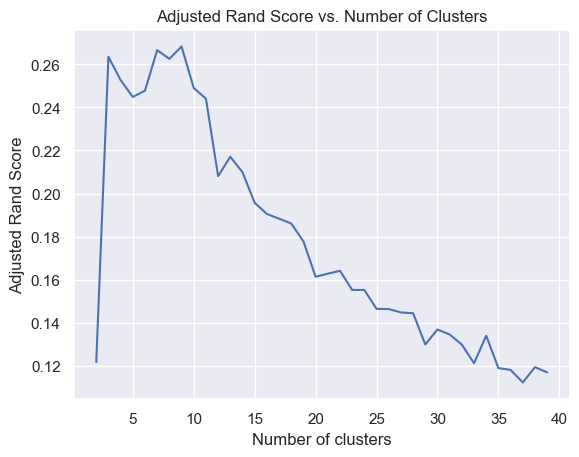

In [5]:
best_n = cluster_counts[np.argmax(losses)]
best_preds = models[np.argmax(losses)].predict(X_test)
best_score = adjusted_rand_score(Y_test, best_preds)

print(f"Best number of clusters to match the original categories: {best_n} at {best_score:.3f} ARI")
# Evaluate in terms of similarity to the "ground truth" category-based clustering.

plt.plot(cluster_counts, losses)
plt.title("Adjusted Rand Score vs. Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")

plt.show()

In [6]:
wcss = np.array([model.inertia_ for model in models])

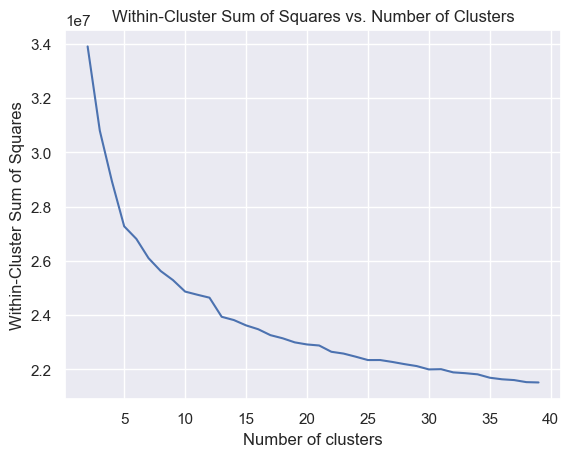

In [7]:
plt.plot(cluster_counts, wcss)
plt.title("Within-Cluster Sum of Squares vs. Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares")

plt.show()


# Summary

From the analysis above we see that ARI reaches an optimal value at 9 clusters.
Similarly, applying the elbow method to the within-cluster sum of squares, we see that the optimal number of clusters is close to 9.

From this, following the original problem statement, I propose that the optimal number of clusters is 9.